<a href="https://colab.research.google.com/github/jpdicarvalho/POO-Python/blob/main/Projeto_Elei%C3%A7%C3%B5es_de_Condomnio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Eleição de Condomínio**
# **Author: João Pedro Braga de Carvalho**
---
## **Documentação do Projeto: Organizando uma Eleição**
Este documento descreve a estrutura e a funcionalidade do sistema eletrônico desenvolvido para auxiliar na votação do novo síndico em um condomínio.

#Estrutura de Classes

## Morador
Representa cada pessoa que habita no condomínio.
1. **Atributos**: nome, apartamento.
2. **Métodos**:
- **Construtor**: recebe opcionalmente um nome e um objeto Apartamento. Se não receber um nome, solicita através de input. Se não receber um objeto Apartamento, solicita o número do apartamento e cria o objeto.
- **Votar**: recebe um objeto Urna e um número de candidato (opcional) e registra o voto na Urna.

In [1]:
import matplotlib.pyplot as plt

class Morador():
    def __init__(self, nome, num_apartamento):
        self.nome = nome
        self.num_apartamento = num_apartamento

    def votar(self, urna, num_apartamento):
        num_candidato_votado = input("Digite o número do candidato em que deseja votar (ou digite 0 para sair): ")
        if num_candidato_votado == '0':
            return

        num_candidato_votado = int(num_candidato_votado)

        for apartamento in urna.listApartments.values():
            candidato = apartamento.get('candidato')
            if candidato and candidato['numCandidatura'] == num_candidato_votado:
                candidato['votosRecebidos'] += 1
                quemVotou = urna.listApartments[self.num_apartamento]
                if not quemVotou['voto']:
                    quemVotou['voto'] = True
                    print("Voto registrado com sucesso!")
                    return

        print("Número de candidatura não encontrado. Por favor, tente novamente.")

## Candidato
É um tipo especial de Morador.
1. **Atributos**: número (identificação na Urna), contagem de votos.
2. **Método**:
- **Construtor**: inicializa com nome e apartamento do Morador e atribui 0 à contagem de votos.


In [2]:
class Candidato(Morador):
    def __init__(self, nome, num_apartamento, numCandidatura):
        super().__init__(nome, num_apartamento)
        self.numCandidatura = numCandidatura
        self.votosRecebidos = 0

## Apartamento
Representa as unidades do prédio.
1. **Atributos**: número do apartamento a ser cadastrado e uma lista de apartamentos para ser inserido.
2. **Métodos**:
- **Adicionar Morador**: adiciona um objeto Morador à lista.
- **Adicionar Candidato**: adiciona um objeto Candidato à lista.
- **Visualizar Moradores**: exibe a lista de moradores.

In [3]:
class Apartamento():
    def __init__(self, listApartments={}):
        self.listApartments = listApartments

    def createMorador(self):
        nome = input('Nome do morador: ')
        numApartamento = input('Qual o número do apartamento? ')
        if numApartamento in self.listApartments:
            self.listApartments[numApartamento]['morador'] = {'nome': nome}
        else:
            self.listApartments[numApartamento] = {
                'morador': {'nome': nome},
                'voto': False
            }
        print("\nApartamento cadastrado com sucesso!")

    def createCandidato(self):
        nome = input('Nome do Candidato: ')
        numApartamento = input('Qual o número do apartamento? ')
        if numApartamento in self.listApartments:
            self.listApartments[numApartamento]['candidato'] = {
                'nome': nome,
                'numCandidatura': 0,
                'votosRecebidos': 0
            }
        else:
            self.listApartments[numApartamento] = {
                'candidato': {
                    'nome': nome,
                    'numCandidatura': 0,
                    'votosRecebidos': 0
                },
                'voto': False
            }
        print("\nApartamento cadastrado com sucesso!")

    def showApartments(self):
        print("\n#Confira abaixo, os apartamentos cadastrados e seus respectivos Moradores e Candidatos:")
        for num_apartamento, detalhes in self.listApartments.items():
            nome_morador = detalhes.get('morador', 'Nenhum morador cadastrado')
            nome_candidato = detalhes.get('candidato', 'Nenhum candidato cadastrado')
            voto = 'apartamento já votou' if detalhes['voto'] else 'apartamento não votou'
            print(f"=-=-=-=-= Apartamento Nº {num_apartamento} =-=-=-=-=")
            print("#Voto:", voto)
            print("#Morador:")
            if isinstance(nome_morador, dict):
                print("  nome:", nome_morador['nome'])
            else:
                print(" ", nome_morador)
            print("#Candidato:")
            for chave, valor in nome_candidato.items():
                print(f"  {chave}: {valor}")

## Urna
Responsável pela lógica da eleição.
1. **Atributos**: coleção de apartamentos contendo os moradores e candidatos.
2. **Métodos**:
- **Cadastro de Apartamentos e Candidatos**: adiciona objetos existentes à coleção e gera número único para candidatos.
- **Listar Candidatos**: lista todos os candidatos.
- **Verificar Término**: verifica se todos os apartamentos já votaram, se o retorno for 'True' a votação é encerrada.
- **Resultado**: apresenta o resultado da votação.

In [4]:
class Urna():
    def __init__(self, listApartments={}):
        self.listApartments = listApartments

    def gerarNumCandidato(self):
        num_candidato = 1001
        for apartamento in self.listApartments.values():
            if 'candidato' in apartamento:
                apartamento['candidato']['numCandidatura'] = num_candidato
                num_candidato += 1

    def listarCandidatos(self):
        print("\n#Confira abaixo, os candidatos disponíveis:")
        for num_apartamento, detalhes in self.listApartments.items():
            candidato = detalhes.get('candidato')
            if candidato:
                nome_candidato = candidato['nome']
                num_candidatura = candidato['numCandidatura']
                print(f">> Candidato: {nome_candidato}, Número de Candidatura: {num_candidatura}")

    def verificaTermino(self):
        return all(value['voto'] for value in self.listApartments.values())

    def resultado(self):
        print("\nApuração dos votos:")
        votos_por_candidato = {}
        for detalhes in self.listApartments.values():
            candidato = detalhes.get('candidato')
            if candidato:
                votos_recebidos = candidato['votosRecebidos']
                candidato_nome = candidato['nome']
                votos_por_candidato[candidato_nome] = votos_recebidos

        votos_ordenados = sorted(votos_por_candidato.items(), key=lambda x: x[1], reverse=True)
        votos_vencedor = votos_ordenados[0][1]
        candidatos_vencedores = [candidato for candidato, votos in votos_ordenados if votos == votos_vencedor]

        if len(candidatos_vencedores) == 1:
            print(f"Candidato vencedor: {candidatos_vencedores[0]}, Votos Recebidos: {votos_vencedor}")
        else:
            print("Houve um empate entre os seguintes candidatos:")
            for candidato in candidatos_vencedores:
                print(f"- {candidato}")
            print("Será necessário realizar uma votação de desempate.")

        plt.figure(figsize=(5, 3))
        plt.bar(votos_por_candidato.keys(), votos_por_candidato.values(), color='blue')
        plt.xlabel('Candidatos')
        plt.ylabel('Votos Recebidos')
        plt.title('Resultado da Eleição')
        plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x
        plt.tight_layout()
        plt.show()

# Programa Principal
O programa principal possui 3 etapas:

1. **Cadastro**: Lê informações sobre moradores e cria os objetos Morador/Candidato e Apartamento correspondentes.
2. **Configuração**: Utiliza as informações obtidas para criar uma Urna.
3. **Votação**: Permite que os moradores votem. Encerra quando a Urna informa que a votação acabou.

Digite M para cadastrar um Morador e C para cadastrar um Candidato (ou digite qualquer outra tecla para sair): C
Nome do Candidato: JOÃO
Qual o número do apartamento? 101

Apartamento cadastrado com sucesso!
Digite M para cadastrar um Morador e C para cadastrar um Candidato (ou digite qualquer outra tecla para sair): M
Nome do morador: DANIEL
Qual o número do apartamento? 101

Apartamento cadastrado com sucesso!
Digite M para cadastrar um Morador e C para cadastrar um Candidato (ou digite qualquer outra tecla para sair): C
Nome do Candidato: PEDRO
Qual o número do apartamento? 102

Apartamento cadastrado com sucesso!
Digite M para cadastrar um Morador e C para cadastrar um Candidato (ou digite qualquer outra tecla para sair): N
Opção inválida. Encerrando o cadastro.

====== Cadastro concluído. Vamos começar a eleição! =====

#Confira abaixo, os apartamentos cadastrados e seus respectivos Moradores e Candidatos:
=-=-=-=-= Apartamento Nº 101 =-=-=-=-=
#Voto: apartamento não votou
#Morado

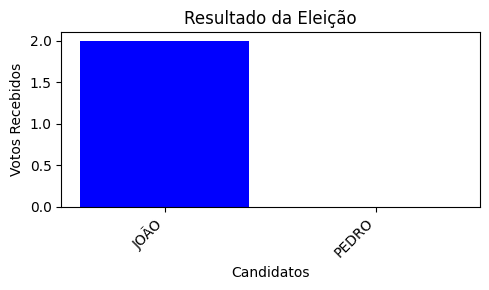

In [6]:
def main():
    listApartments = {}
    apartamento = Apartamento(listApartments)
    urna = Urna(listApartments)

    while True:
        tipo = input("Digite M para cadastrar um Morador e C para cadastrar um Candidato (ou digite qualquer outra tecla para sair): ")

        if tipo.upper() == 'M':
            apartamento.createMorador()

        elif tipo.upper() == 'C':
            apartamento.createCandidato()

        else:
            print("Opção inválida. Encerrando o cadastro.")
            break

    urna.gerarNumCandidato()

    print("\n====== Cadastro concluído. Vamos começar a eleição! =====")

    while True:
        apartamento.showApartments()

        votoApartamento = input(f'\nInforme o número do apartamento que irá votar: ')
        if votoApartamento not in listApartments:
            print("XXXXX Número de apartamento inválido. Por favor, tente novamente. XXXXX")
            continue

        detalhes = listApartments[votoApartamento]
        if detalhes['voto']:
            print("XXXX Este apartamento já votou. XXXX")
            continue

        print("+++ Apartamento habilitado a votar! +++")
        urna.listarCandidatos()

        morador = Morador(detalhes.get('Morador', detalhes.get('Candidato')), votoApartamento)
        morador.votar(urna, votoApartamento)

        if urna.verificaTermino():
            urna.resultado()
            break

if __name__ == "__main__":
    main()

# **Conclusão**

## Cadastro de Moradores e Candidatos

No início do programa, foram oferecidas opções para cadastrar Moradores (M) e Candidatos (C) para os apartamentos.
Cada Morador ou Candidato foi associado a um apartamento específico, inserindo seus dados conforme solicitado.

##Eleição

Após o cadastro dos Moradores e Candidatos, deu-se início à eleição.
Os apartamentos foram habilitados a votar sequencialmente, permitindo que os moradores registrassem seus votos.
Foi verificado se o apartamento já havia votado anteriormente para evitar votos duplicados.
Após o registro de todos os votos, a apuração foi realizada para determinar o candidato vencedor.

##Resultados

O resultado da eleição foi exibido, indicando o candidato vencedor e o número de votos recebidos por ele.

## Gráfico de Resultados

Além da análise textual, os resultados foram visualizados em um gráfico de barras, facilitando a compreensão e visualização dos votos recebidos por cada candidato.
O programa concluiu com sucesso o processo de eleição, garantindo transparência e eficiência na contagem dos votos e na determinação do vencedor.






